<a href="https://colab.research.google.com/github/573737/FALL-DETECTION/blob/main/Fall_Dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FALL DECTECTION USING DEEP LEARNING

**Aim** - This project aims to build a fall detection system using deep learning techniques. Falls are a significant health risk, especially for the elderly or those with certain medical conditions. They can lead to serious injuries, increased healthcare costs, and a reduction in quality of life. The goal of this project is to develop a reliable and accurate fall detection system that can alert caregivers or emergency services when a fall is detected.

**methodology** - The model is designed to be trained and deployed locally on the user's device, reducing privacy concerns and allowing for a more extensive and diverse dataset. This approach not only addresses privacy but also improves the robustness of the model, as it adapts to a wider range of user data. Our model incorporates deep learning techniques to detect falls with high accuracy.

With these considerations, this project seeks to contribute to the advancement of AI in healthcare, demonstrating how technology can be harnessed responsibly to address critical societal issues like fall detection and risk analysis.

## 1. Set up
Before starting, make sure the required packages are installed.

In [1]:
import random
random.seed(42)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import math

from sklearn.model_selection import train_test_split

## 2. Dataset

 Our dataset contains motion data from wearable sensors, collected from 17 volunteers who performed an average of 5 repetitions for each of the 36 distinct movements. These movements include both falls (20 different types) and daily living activities (16 different types).The dataset comprises five sensors, each with a 3-axis accelerometer, gyroscope, and magnetometer, providing a rich set of attributes for deep learning analysis.
owners of the database are cited in the research paper

### Structure of the Data
Here is a brief description of the data columns:

1. **Counter**: A sequential counter for data records.
2. **Temperature**: Sensor temperature reading.
3. **VelInc_X, VelInc_Y, VelInc_Z**: Incremental velocity in three axes.
4. **OriInc_w, OriInc_x, OriInc_y, OriInc_z**: Orientation data in quaternion format.
5. **Acc_X, Acc_Y, Acc_Z**: Accelerometer data across three axes.
6. **Gyr_X, Gyr_Y, Gyr_Z**: Gyroscope data across three axes.
7. **Mag_X, Mag_Y, Mag_Z**: Magnetometer data across three axes.
8. **Pressure**: Barometric pressure.
9. **Roll, Pitch, Yaw**: Euler angles representing sensor orientation.
10. **RSSI**: Received Signal Strength Indicator, indicative of signal strength.

### Classes of Fall Actions
There are 20 different classes of fall actions, each with a unique label and description. Below is the list of these fall actions:

1. **901** - Front-lying: Falling forward from a vertical position to the floor.
2. **902** - Front-protecting-lying: Falling forward with arm protection.
3. **903** - Front-knees: Falling down on the knees from a vertical position.
4. **904** - Front-knees-lying: Falling down on the knees and then lying on the floor.
5. **905** - Front-quick-recovery: Falling and quickly recovering.
6. **906** - Front-slow-recovery: Falling and slowly recovering.
7. **907** - Front-right: Falling and ending in a right lateral position.
8. **908** - Front-left: Falling and ending in a left lateral position.
9. **909** - Back-sitting: Falling and ending in a sitting position.
10. **910** - Back-lying: Falling and ending lying on the back.
11. **911** - Back-right: Falling and ending in a right lateral position.
12. **912** - Back-left: Falling and ending in a left lateral position.
13. **913** - Right-sideway: Falling to the right and lying down.
14. **914** - Right-recovery: Falling and recovering from the right side.
15. **915** - Left-sideway: Falling to the left and lying down.
16. **916** - Left-recovery: Falling and recovering from the left side.
17. **917** - Rolling-out-bed: Rolling out of bed and falling to the floor.
18. **918** - Podium: Falling from a podium to the floor.
19. **919** - Syncope: Falling straight down following a vertical trajectory.
20. **920** - Syncope-wall: Falling while slowly slipping against a wall.

### Classes of Non-Fall Actions (ADLs)
The dataset also contains 16 classes of non-fall actions, representing typical activities of daily living. These classes are:

1. **801** - Walking-fw: Walking forward.
2. **802** - Walking-bw: Walking backward.
3. **803** - Jogging: Running or jogging.
4. **804** - Squatting-down: Squatting and then standing up.
5. **805** - Bending: Bending about 90 degrees.
6. **806** - Bending-pick-up: Bending to pick up an object on the floor.
7. **807** - Limp: Walking with a limp.
8. **808** - Stumble: Stumbling with recovery.
9. **809** - Trip-over: Tripping over something and continuing to walk.
10. **810** - Coughing-sneezing: Coughing or sneezing.
11. **811** - Sit-chair: Sitting down from a vertical position with acceleration onto a chair.
12. **812** - Sit-sofa: Sitting down from a vertical position onto a sofa.
13. **813** - Sit-air: Sitting in the air, engaging leg muscles.
14. **814** - Sit-bed: Sitting down from a vertical position onto a bed.
15. **815** - Lying-bed: Lying down on a bed.
16. **816** - Rising-bed: Rising from a lying to sitting position on a bed.



In [2]:
df = pd.read_csv('/content/Fall model data.csv')
df.head()

,Counter,Temperature,VelInc_X,VelInc_Y,VelInc_Z,OriInc_w,OriInc_x,OriInc_y,OriInc_z,Acc_X,...,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Pressure,Roll,Pitch,Yaw,RSSI,Action
0,19065.0,0.0,0.370667,-0.052429,0.131653,0.999999,0.001026,0.000325,0.000599,9.266663,...,0.029945,-0.703613,0.517090,0.605469,899.42,-22.144486,-69.316055,-131.113442,-81.0,801.0
1,19066.0,0.0,0.369054,-0.052545,0.129802,0.999998,0.001191,0.000365,0.000614,9.226346,...,0.030708,-0.705811,0.517090,0.596924,899.36,-22.120436,-69.252172,-130.999115,-81.0,801.0
2,19067.0,0.0,0.367676,-0.051453,0.125671,0.999998,0.001431,0.000423,0.000565,9.191895,...,0.028229,-0.703613,0.519043,0.596680,899.36,-22.048174,-69.184337,-130.907954,-83.0,801.0
3,19068.0,0.0,0.369162,-0.047967,0.127158,0.999999,0.000747,0.000381,0.000583,9.229040,...,0.029135,-0.706055,0.521240,0.596680,899.26,-22.063478,-69.120294,-130.808268,-84.0,801.0
4,19069.0,0.0,0.368469,-0.048401,0.127563,0.999999,0.000034,0.000314,0.000404,9.211731,...,0.020218,-0.703613,0.523438,0.593506,899.38,-22.117628,-69.071186,-130.746418,-82.0,801.0


In [3]:
# Drop rows with at least one null value
df = df.dropna()

In [4]:
# length of dataset
df.shape[0]

822737

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822737 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Counter      822737 non-null  float64
 1   Temperature  822737 non-null  float64
 2   VelInc_X     822737 non-null  float64
 3   VelInc_Y     822737 non-null  float64
 4   VelInc_Z     822737 non-null  float64
 5   OriInc_w     822737 non-null  float64
 6   OriInc_x     822737 non-null  float64
 7   OriInc_y     822737 non-null  float64
 8   OriInc_z     822737 non-null  float64
 9   Acc_X        822737 non-null  float64
 10  Acc_Y        822737 non-null  float64
 11  Acc_Z        822737 non-null  float64
 12  Gyr_X        822737 non-null  float64
 13  Gyr_Y        822737 non-null  float64
 14  Gyr_Z        822737 non-null  float64
 15  Mag_X        822737 non-null  float64
 16  Mag_Y        822737 non-null  float64
 17  Mag_Z        822737 non-null  float64
 18  Pressure     822737 non-null

## 3.Data Preprocessing
To prepare the data for training, we need to normalize it and possibly perform feature engineering.


### splitting the data into train and test sets

In [6]:
X=df.drop(["Counter","Temperature","RSSI"],axis=1)
y=df['Action']

In [7]:
# creating training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(822737, 658189, 164548)

In [8]:
X_train

,VelInc_X,VelInc_Y,VelInc_Z,OriInc_w,OriInc_x,OriInc_y,OriInc_z,Acc_X,Acc_Y,Acc_Z,...,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Pressure,Roll,Pitch,Yaw,Action
353587,0.323425,-0.051147,0.187683,0.999834,0.000291,-0.011982,-0.013687,8.085632,-1.278687,4.692078,...,-0.599131,-0.684394,-0.347412,-0.341553,-0.848145,887.24,-2.018099,-65.032958,21.562547,908.0
708560,0.331152,-0.129995,0.107941,0.999994,0.002201,0.000089,-0.002316,8.278799,-3.249884,2.698517,...,0.004435,-0.115776,-0.613525,0.306396,-0.958496,891.72,-69.778016,-63.725050,54.656500,811.0
485199,0.363131,-0.077914,0.132799,0.999999,-0.000042,0.000034,-0.000057,9.078264,-1.947856,3.319979,...,0.001717,-0.002861,-0.808105,0.430908,0.250244,898.86,-30.102339,-67.138185,-133.881128,919.0
654804,0.377687,-0.033187,0.054684,0.999997,-0.001812,0.000597,0.000549,9.442163,-0.829673,1.367092,...,0.029850,0.027466,-0.951416,0.201416,0.682861,895.82,-27.348202,-81.676755,-137.929138,808.0
615188,0.004272,-0.151672,0.366272,0.999999,-0.000637,-0.000628,0.000343,0.106812,-3.791809,9.156799,...,-0.031424,0.017166,0.874023,0.481689,-0.910889,878.48,-22.738160,-1.134352,-9.832006,806.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326694,-0.097015,-0.257604,-0.251405,0.999967,0.000421,0.005026,-0.006320,-2.425385,-6.440091,-6.285119,...,0.251296,-0.316003,0.142822,1.036865,-0.000244,899.34,-129.251104,10.490261,94.201155,907.0
446676,0.365788,-0.117243,0.092461,0.999999,0.000805,-0.000267,-0.000443,9.144711,-2.931070,2.311516,...,-0.013351,-0.022125,-0.481201,0.748535,-0.485107,887.06,-50.454298,-68.397411,-14.278531,916.0
175927,0.376655,-0.103298,-0.020315,0.999999,0.000161,-0.000359,0.000103,9.416366,-2.582455,-0.507879,...,-0.017929,0.005150,-0.634033,0.862061,-0.342773,889.88,-100.694322,-73.930029,40.699496,811.0
838136,0.378445,-0.062300,0.089320,1.000000,0.000041,-0.000035,-0.000005,9.461117,-1.557493,2.233005,...,-0.001764,-0.000238,-0.657959,-0.230469,-0.708252,896.22,-34.702654,-73.662871,62.065653,903.0


In [9]:
y_train

353587    908.0
708560    811.0
485199    919.0
654804    808.0
615188    806.0
          ...  
326694    907.0
446676    916.0
175927    811.0
838136    903.0
160361    810.0
Name: Action, Length: 658189, dtype: float64

### mapping and normalizing the data

In [10]:
import numpy as np

# Define the mapping dictionary
mapping_dict = {
    801: 0, 802: 1, 803: 2, 804: 3, 805: 4, 806: 5, 807: 6, 808: 7, 809: 8, 810: 9,
    811: 10, 812: 11, 813: 12, 814: 13, 815: 14, 816: 15,
    901: 16, 902: 17, 903: 18, 904: 19, 905: 20, 906: 21, 907: 22, 908: 23, 909: 24, 910: 25,
    911: 26, 912: 27, 913: 28, 914: 29, 915: 30, 916: 31, 917: 32, 918: 33, 919: 34, 920: 35
}

# Apply the mapping to y_train
X_train_map = np.array([mapping_dict[label] for label in X_train["Action"]])
X_test_map = np.array([mapping_dict[label] for label in X_test["Action"]])

In [11]:
# normalizing the data
X_train_norm=X_train["Pressure"]/X_train["Pressure"].max()
X_test_norm=X_test["Pressure"]/X_test["Pressure"].max()
X_train_norm , X_test_norm

X_train_norm=X_train["Yaw"]/X_train["Yaw"].max()
X_test_norm=X_test["Yaw"]/X_test["Yaw"].max()
X_train_norm , X_test_norm

X_train_norm=X_train["Roll"]/X_train["Roll"].max()
X_test_norm=X_test["Roll"]/X_test["Roll"].max()
X_train_norm , X_test_norm

X_train_norm=X_train["Pitch"]/X_train["Pitch"].max()
X_test_norm=X_test["Pitch"]/X_test["Pitch"].max()
X_train_norm , X_test_norm

(353587   -0.734173
 708560   -0.719408
 485199   -0.757940
 654804   -0.922069
 615188   -0.012806
             ...   
 326694    0.118427
 446676   -0.772155
 175927   -0.834614
 838136   -0.831598
 160361   -0.834686
 Name: Pitch, Length: 658189, dtype: float64,
 36071     -0.777465
 961418     0.050304
 462228    -0.184477
 741763    -0.873581
 357800    -0.749591
              ...   
 265346    -0.715462
 713798    -0.841021
 1045153   -0.768372
 965293    -0.867549
 976940    -0.767093
 Name: Pitch, Length: 164548, dtype: float64)

In [12]:
# creating a copy of X_train
X_train_map_nor = X_train.copy()
X_test_map_nor = X_test.copy()
X_train_map_nor

# Replace the normalized column
X_train_map_nor["Action"] = X_train_map
X_test_map_nor["Action"] = X_test_map

X_train_map_nor["Pressure"] = X_train_norm
X_test_map_nor["Pressure"] = X_test_norm

X_train_map_nor["Roll"] = X_train_norm
X_test_map_nor["Roll"] = X_test_norm

X_train_map_nor["Pitch"] = X_train_norm
X_test_map_nor["Pitch"] = X_test_norm

X_train_map_nor["Yaw"] = X_train_norm
X_test_map_nor["Yaw"] = X_test_norm

In [13]:
# working with normalized nad mapped data
X_train_map_nor , X_test_map_nor

(        VelInc_X  VelInc_Y  VelInc_Z  OriInc_w  OriInc_x  OriInc_y  OriInc_z  \
 353587  0.323425 -0.051147  0.187683  0.999834  0.000291 -0.011982 -0.013687   
 708560  0.331152 -0.129995  0.107941  0.999994  0.002201  0.000089 -0.002316   
 485199  0.363131 -0.077914  0.132799  0.999999 -0.000042  0.000034 -0.000057   
 654804  0.377687 -0.033187  0.054684  0.999997 -0.001812  0.000597  0.000549   
 615188  0.004272 -0.151672  0.366272  0.999999 -0.000637 -0.000628  0.000343   
 ...          ...       ...       ...       ...       ...       ...       ...   
 326694 -0.097015 -0.257604 -0.251405  0.999967  0.000421  0.005026 -0.006320   
 446676  0.365788 -0.117243  0.092461  0.999999  0.000805 -0.000267 -0.000443   
 175927  0.376655 -0.103298 -0.020315  0.999999  0.000161 -0.000359  0.000103   
 838136  0.378445 -0.062300  0.089320  1.000000  0.000041 -0.000035 -0.000005   
 160361  0.377915 -0.099388 -0.036314  0.999999  0.000018  0.000038  0.000125   
 
            Acc_X     Acc_

In [14]:
# Apply the mapping to y_train and y_test
y_train_mapped = np.array([mapping_dict[label] for label in y_train])
y_test_mapped = np.array([mapping_dict[label] for label in y_test])

## 4. Multi-regression model

## visualizing the data


 The graph indicates how each feature is varying for different Fall and non-Fall Actions

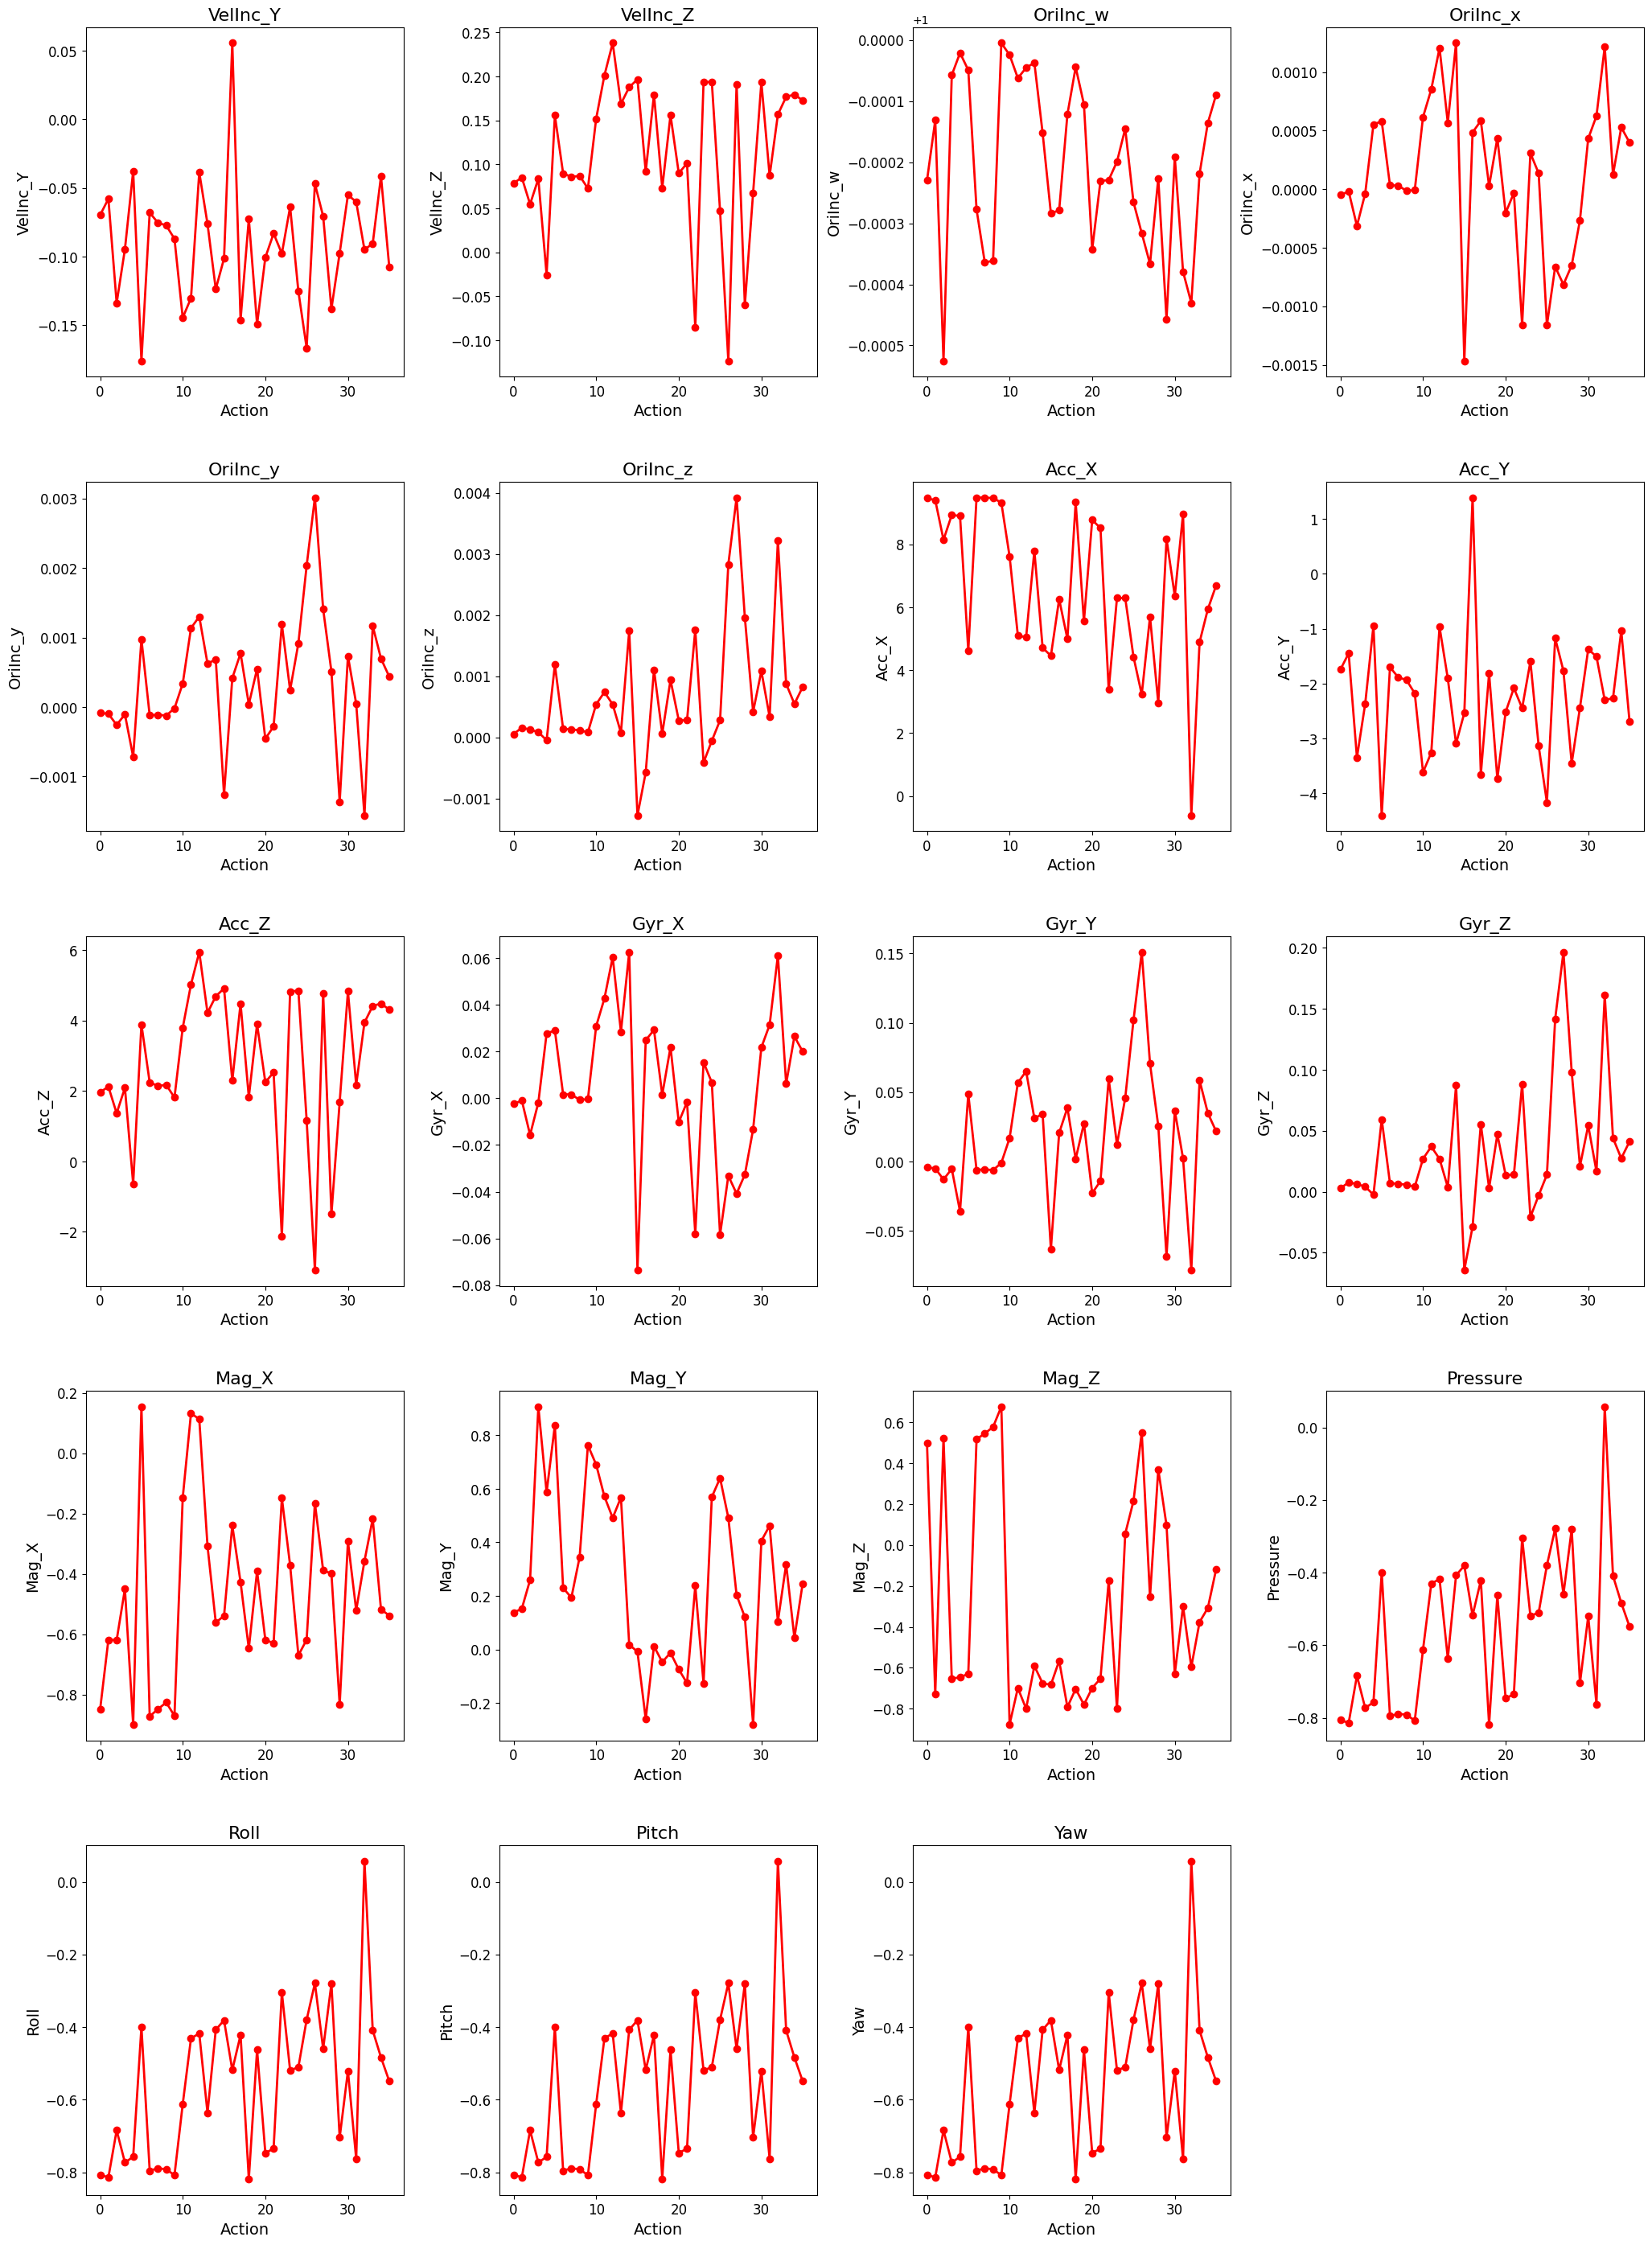

In [15]:
# Ensure 'y_train_mapped' is a 1-dimensional Series with the correct name
if not isinstance(y_train_mapped, pd.Series):
    y_train_mapped = pd.Series(y_train_mapped, name='Action')

# List of features to plot (excluding the first and last)
features = list(X_train_map_nor.columns[1:-1])

# Set up the number of columns and calculate the number of rows
cols = 4
rows = math.ceil(len(features) / cols)

# Create a larger subplot grid with a white background and appropriate figure size
fig, axs = plt.subplots(rows, cols, figsize=(25, 35), facecolor='white')  # White figure background

# Flatten the array of axes for easier iteration
axs = axs.flatten()

# Loop through each feature to create the subplots
for ax, feature in zip(axs, features):
    # Group by 'Action' and calculate the mean for each feature
    grouped_data = X_train_map_nor.groupby('Action')[feature].mean()

    # Set white background for each subplot and ensure axis visibility
    ax.set_facecolor('white')  # White subplot background

    # Set axis lines to black for visibility
    ax.spines['bottom'].set_color('black')  # X-axis line
    ax.spines['left'].set_color('black')  # Y-axis line

    # Ensure all spines (axes) are visible
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    # Plot a line graph with a dark color for contrast
    ax.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='red', linewidth=2)  # Blue line

    # Set axis labels and titles with larger font size for readability
    ax.set_title(feature, fontsize=16, color='black')  # Dark title
    ax.set_xlabel('Action', fontsize=14, color='black')  # X-axis label
    ax.set_ylabel(feature, fontsize=14, color='black')  # Y-axis label

    # Adjust tick parameters for better visibility
    ax.tick_params(axis='both', colors='black', labelsize=12)  # Dark tick labels

# Remove unused axes if any subplots are empty
for ax in axs[len(features):]:
    ax.remove()

# Adjust layout to prevent overlap and ensure proper spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Display the plots
plt.show()


## Multi-Regression Model
The multi-regression model in this project is designed to predict a continuous outcome using a deep learning approach. Below is a brief overview of the model's architecture, compilation settings, and training process.

### Model Architecture
The model is built using the `tf.keras.Sequential` framework, which allows for a straightforward, linear stack of layers. The architecture consists of three dense (fully connected) layers:

- **Dense Layer 1**: This initial layer contains 100 units with a linear activation function, offering a simple, direct transformation of the input data.
- **Dense Layer 2**: The second dense layer contains 10 units, also with a linear activation function, to further transform the data.
- **Dense Layer 3**: The final dense layer has a single unit with a linear activation function, providing a single continuous output, suitable for regression tasks.

### Compilation Settings
The model is compiled with the following settings:

- **Loss Function**: The Mean Absolute Error (MAE) is used as the loss function. This metric is a common choice for regression tasks, focusing on the absolute differences between predicted and actual values.
- **Optimizer**: The Adam optimizer is used, with a learning rate of 0.1. Adam is known for its adaptive learning rate and efficiency in training deep learning models.
- **Metrics**: In addition to the loss function, the model tracks MAE as a key metric to monitor during training.

### Training Process
The model is trained using the `fit` method, with the following parameters:

- **Input Data**: The model is trained with `X_train_map_nor` as the input features and `y_train_mapped` as the target output.
- **Epochs**: The training process runs for 35 epochs, allowing the model to learn and improve over time.
- **Validation Data**: A validation set (`X_test_map_nor` and `y_test_mapped`) is used to evaluate the model's performance during training, helping to prevent overfitting and ensure generalization.

During training, the model's performance is monitored using the loss function and MAE metric. The use of validation data allows for early detection of overfitting and provides a basis for tuning the model's parameters for better performance.


In [16]:
# set random seed
tf.random.set_seed(42)

#creating the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="linear"),
    tf.keras.layers.Dense(10,activation="linear"),
    tf.keras.layers.Dense(1,activation="linear")
])

#compiling the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    metrics=["mae"]
)

#fiting the model
norm_history_1=model_1.fit(X_train_map_nor,y_train_mapped,epochs=15,validation_data=((X_test_map_nor,y_test_mapped)))

Epoch 1/15
20569/20569 [==============================] - 53s 3ms/step - loss: 0.0724 - mae: 0.0724 - val_loss: 0.0430 - val_mae: 0.0430
Epoch 2/15
20569/20569 [==============================] - 56s 3ms/step - loss: 0.0371 - mae: 0.0371 - val_loss: 0.0563 - val_mae: 0.0563
Epoch 3/15
20569/20569 [==============================] - 55s 3ms/step - loss: 0.0346 - mae: 0.0346 - val_loss: 0.0238 - val_mae: 0.0238
Epoch 4/15
20569/20569 [==============================] - 50s 2ms/step - loss: 0.0316 - mae: 0.0316 - val_loss: 0.1182 - val_mae: 0.1182
Epoch 5/15
20569/20569 [==============================] - 56s 3ms/step - loss: 0.0295 - mae: 0.0295 - val_loss: 0.0332 - val_mae: 0.0332
Epoch 6/15
20569/20569 [==============================] - 51s 2ms/step - loss: 0.0282 - mae: 0.0282 - val_loss: 0.0064 - val_mae: 0.0064
Epoch 7/15
20569/20569 [==============================] - 72s 4ms/step - loss: 0.0267 - mae: 0.0267 - val_loss: 0.0198 - val_mae: 0.0198
Epoch 8/15
20569/20569 [=================

## 5.Evaluation and results of multi-regression model

In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2200      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3221 (12.58 KB)
Trainable params: 3221 (12.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# evaluate
model_1.evaluate(X_test_map_nor,y_test_mapped)

#prediction
y_pred_1=model_1.predict(X_test_map_nor)
y_pred_1

# rounding-off predictions
y_pred_1=np.round(y_pred_1).astype(int)
y_pred_1

5143/5143 [==============================] - 9s 2ms/step


array([[ 2],
       [26],
       [32],
       ...,
       [31],
       [26],
       [27]])

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_mapped, y_pred_1)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


## visualizing the results

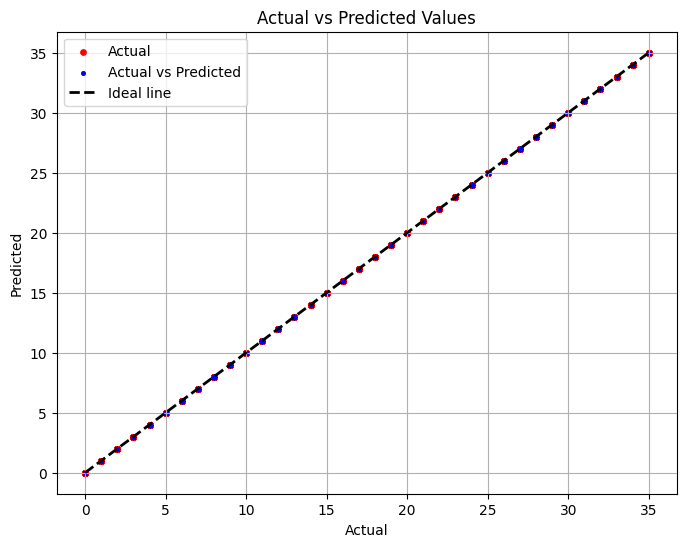

In [21]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_mapped, y_test_mapped, s=15, color='red', label='Actual')
plt.scatter(y_test_mapped, y_pred_1,s=7, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test_mapped), max(y_test_mapped)], [min(y_test_mapped), max(y_test_mapped)], 'k--', lw=2, label='Ideal line')  # Plotting ideal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## 6. multi-class classification model

This multi-class classification model is designed to classify data into one of 36 distinct categories, representing different fall and non-fall actions. Below is a brief overview of the model's architecture, compilation settings, and training process.

### Model Architecture
The model is constructed using the `tf.keras.Sequential` framework, allowing for a straightforward, sequential stack of layers. It includes the following components:

- **Flatten Layer**: The input layer flattens the input features into a single-dimensional array. This is useful for transforming structured data into a format suitable for dense layers.
- **Dense Layer 1**: This dense layer contains 144 units with a linear activation function, providing a basic transformation of the input data.
- **Dense Layer 2**: The second dense layer contains 72 units with a linear activation function, further refining the data.
- **Output Layer**: The final layer has 36 units with a softmax activation function, which normalizes the outputs to represent probabilities for each of the 36 classes. This structure is ideal for multi-class classification tasks.

### Compilation Settings
The model is compiled with the following configurations:

- **Loss Function**: The Sparse Categorical Crossentropy loss function is used. This loss function is suitable for multi-class classification when the target labels are provided as integers, not one-hot encoded.
- **Optimizer**: The Adam optimizer, with a learning rate of 0.1, is used to train the model. Adam is known for its efficiency and adaptive learning rate, which makes it a popular choice for deep learning models.
- **Metrics**: Accuracy is used as the primary metric to evaluate the model's performance during training. It measures the proportion of correctly predicted classes, providing a simple indicator of classification success.

### Training Process
The model is trained using the `fit` method with the following parameters:

- **Input Data**: The model is trained with `X_train_map_nor` as the input features and `y_train_mapped` as the target labels.
- **Epochs**: The model is trained for 35 epochs, allowing it to learn and improve over time.
- **Validation Data**: A validation set (`X_test_map_nor` and `y_test_mapped`) is used during training to monitor the model's performance and detect potential overfitting.


In [43]:
# Set random seed
tf.random.set_seed(42)

# Define the model
model_classifi_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(21,)),
    tf.keras.layers.Dense(144, activation='linear'),
    tf.keras.layers.Dense(72, activation='linear'),
    tf.keras.layers.Dense(36, activation='softmax')  # Output layer for multiclass classification
])

# Compile the model with appropriate loss and metrics
model_classifi_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=10),
    metrics=["accuracy"]  # Using accuracy as a metric for classification
)


# Fit the model
norm_history_2 =model_classifi_1.fit(X_train_map_nor,y_train_mapped, epochs=35,
                                   validation_data=(X_test_map_nor,y_test_mapped))

Epoch 1/35
20569/20569 [==============================] - 72s 3ms/step - loss: 0.7020 - accuracy: 0.7646 - val_loss: 0.3119 - val_accuracy: 0.9080
Epoch 2/35
20569/20569 [==============================] - 68s 3ms/step - loss: 0.3078 - accuracy: 0.9101 - val_loss: 0.2630 - val_accuracy: 0.9115
Epoch 3/35
20569/20569 [==============================] - 74s 4ms/step - loss: 0.2330 - accuracy: 0.9380 - val_loss: 0.1061 - val_accuracy: 0.9807
Epoch 4/35
20569/20569 [==============================] - 75s 4ms/step - loss: 0.2005 - accuracy: 0.9506 - val_loss: 0.1633 - val_accuracy: 0.9571
Epoch 5/35
20569/20569 [==============================] - 70s 3ms/step - loss: 0.1681 - accuracy: 0.9600 - val_loss: 0.1520 - val_accuracy: 0.9655
Epoch 6/35
20569/20569 [==============================] - 68s 3ms/step - loss: 0.1513 - accuracy: 0.9645 - val_loss: 0.1991 - val_accuracy: 0.9426
Epoch 7/35
20569/20569 [==============================] - 63s 3ms/step - loss: 0.1458 - accuracy: 0.9673 - val_loss: 0

## 7.Evaluation and results of multi-Class classification model

In [44]:
model_classifi_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 21)                0         
                                                                 
 dense_15 (Dense)            (None, 144)               3168      
                                                                 
 dense_16 (Dense)            (None, 72)                10440     
                                                                 
 dense_17 (Dense)            (None, 36)                2628      
                                                                 
Total params: 16236 (63.42 KB)
Trainable params: 16236 (63.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# evaluating the model
model_classifi_1.evaluate(X_test_map_nor,y_test_mapped)

# prediction from the model
model_classifi_1_pred = model_classifi_1.predict(X_test_map_nor)

# Find the index with the maximum probability for each example
predicted_indices = tf.argmax(model_classifi_1_pred, axis=1)
predicted_indices

5143/5143 [==============================] - 10s 2ms/step


<tf.Tensor: shape=(164548,), dtype=int64, numpy=array([ 2, 26, 32, ..., 31, 26, 27])>

In [46]:
# Reverse the dictionary to map from indices to original keys
reversed_mapping_dict = {v: k for k, v in mapping_dict.items()}

# Find the class identifiers with the maximum probabilities
predicted_classes = [reversed_mapping_dict[idx] for idx in predicted_indices.numpy()]

print("Predicted classes:", predicted_classes)
model_classifi_1_pred=tf.constant(predicted_classes)
model_classifi_1_pred

Predicted classes: [803, 911, 917, 813, 909, 816, 909, 816, 905, 802, 812, 910, 804, 815, 909, 909, 901, 915, 913, 905, 905, 804, 807, 805, 808, 901, 914, 918, 912, 808, 915, 902, 914, 802, 805, 908, 810, 919, 906, 802, 809, 907, 915, 907, 914, 920, 909, 919, 815, 812, 914, 814, 804, 816, 809, 914, 906, 907, 912, 905, 920, 809, 906, 802, 912, 904, 905, 812, 807, 903, 912, 806, 806, 807, 807, 913, 809, 811, 809, 908, 912, 904, 920, 910, 801, 808, 904, 811, 802, 802, 807, 912, 910, 902, 914, 907, 806, 905, 906, 902, 912, 913, 915, 814, 806, 805, 914, 804, 912, 914, 906, 802, 902, 915, 811, 917, 803, 807, 903, 803, 806, 902, 815, 903, 916, 912, 915, 802, 910, 912, 907, 901, 804, 903, 909, 909, 801, 803, 802, 904, 807, 910, 918, 910, 804, 807, 815, 815, 802, 914, 910, 905, 808, 912, 810, 801, 812, 815, 805, 917, 813, 902, 911, 918, 810, 902, 917, 910, 804, 802, 801, 804, 801, 814, 909, 901, 918, 912, 802, 814, 905, 805, 902, 914, 902, 907, 807, 914, 802, 816, 816, 815, 808, 810, 908, 904, 

<tf.Tensor: shape=(164548,), dtype=int32, numpy=array([803, 911, 917, ..., 916, 911, 912], dtype=int32)>

In [47]:
correct_predictions = tf.equal(model_classifi_1_pred, y_test)
correct_predictions

<tf.Tensor: shape=(164548,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>

## Visualizing the results

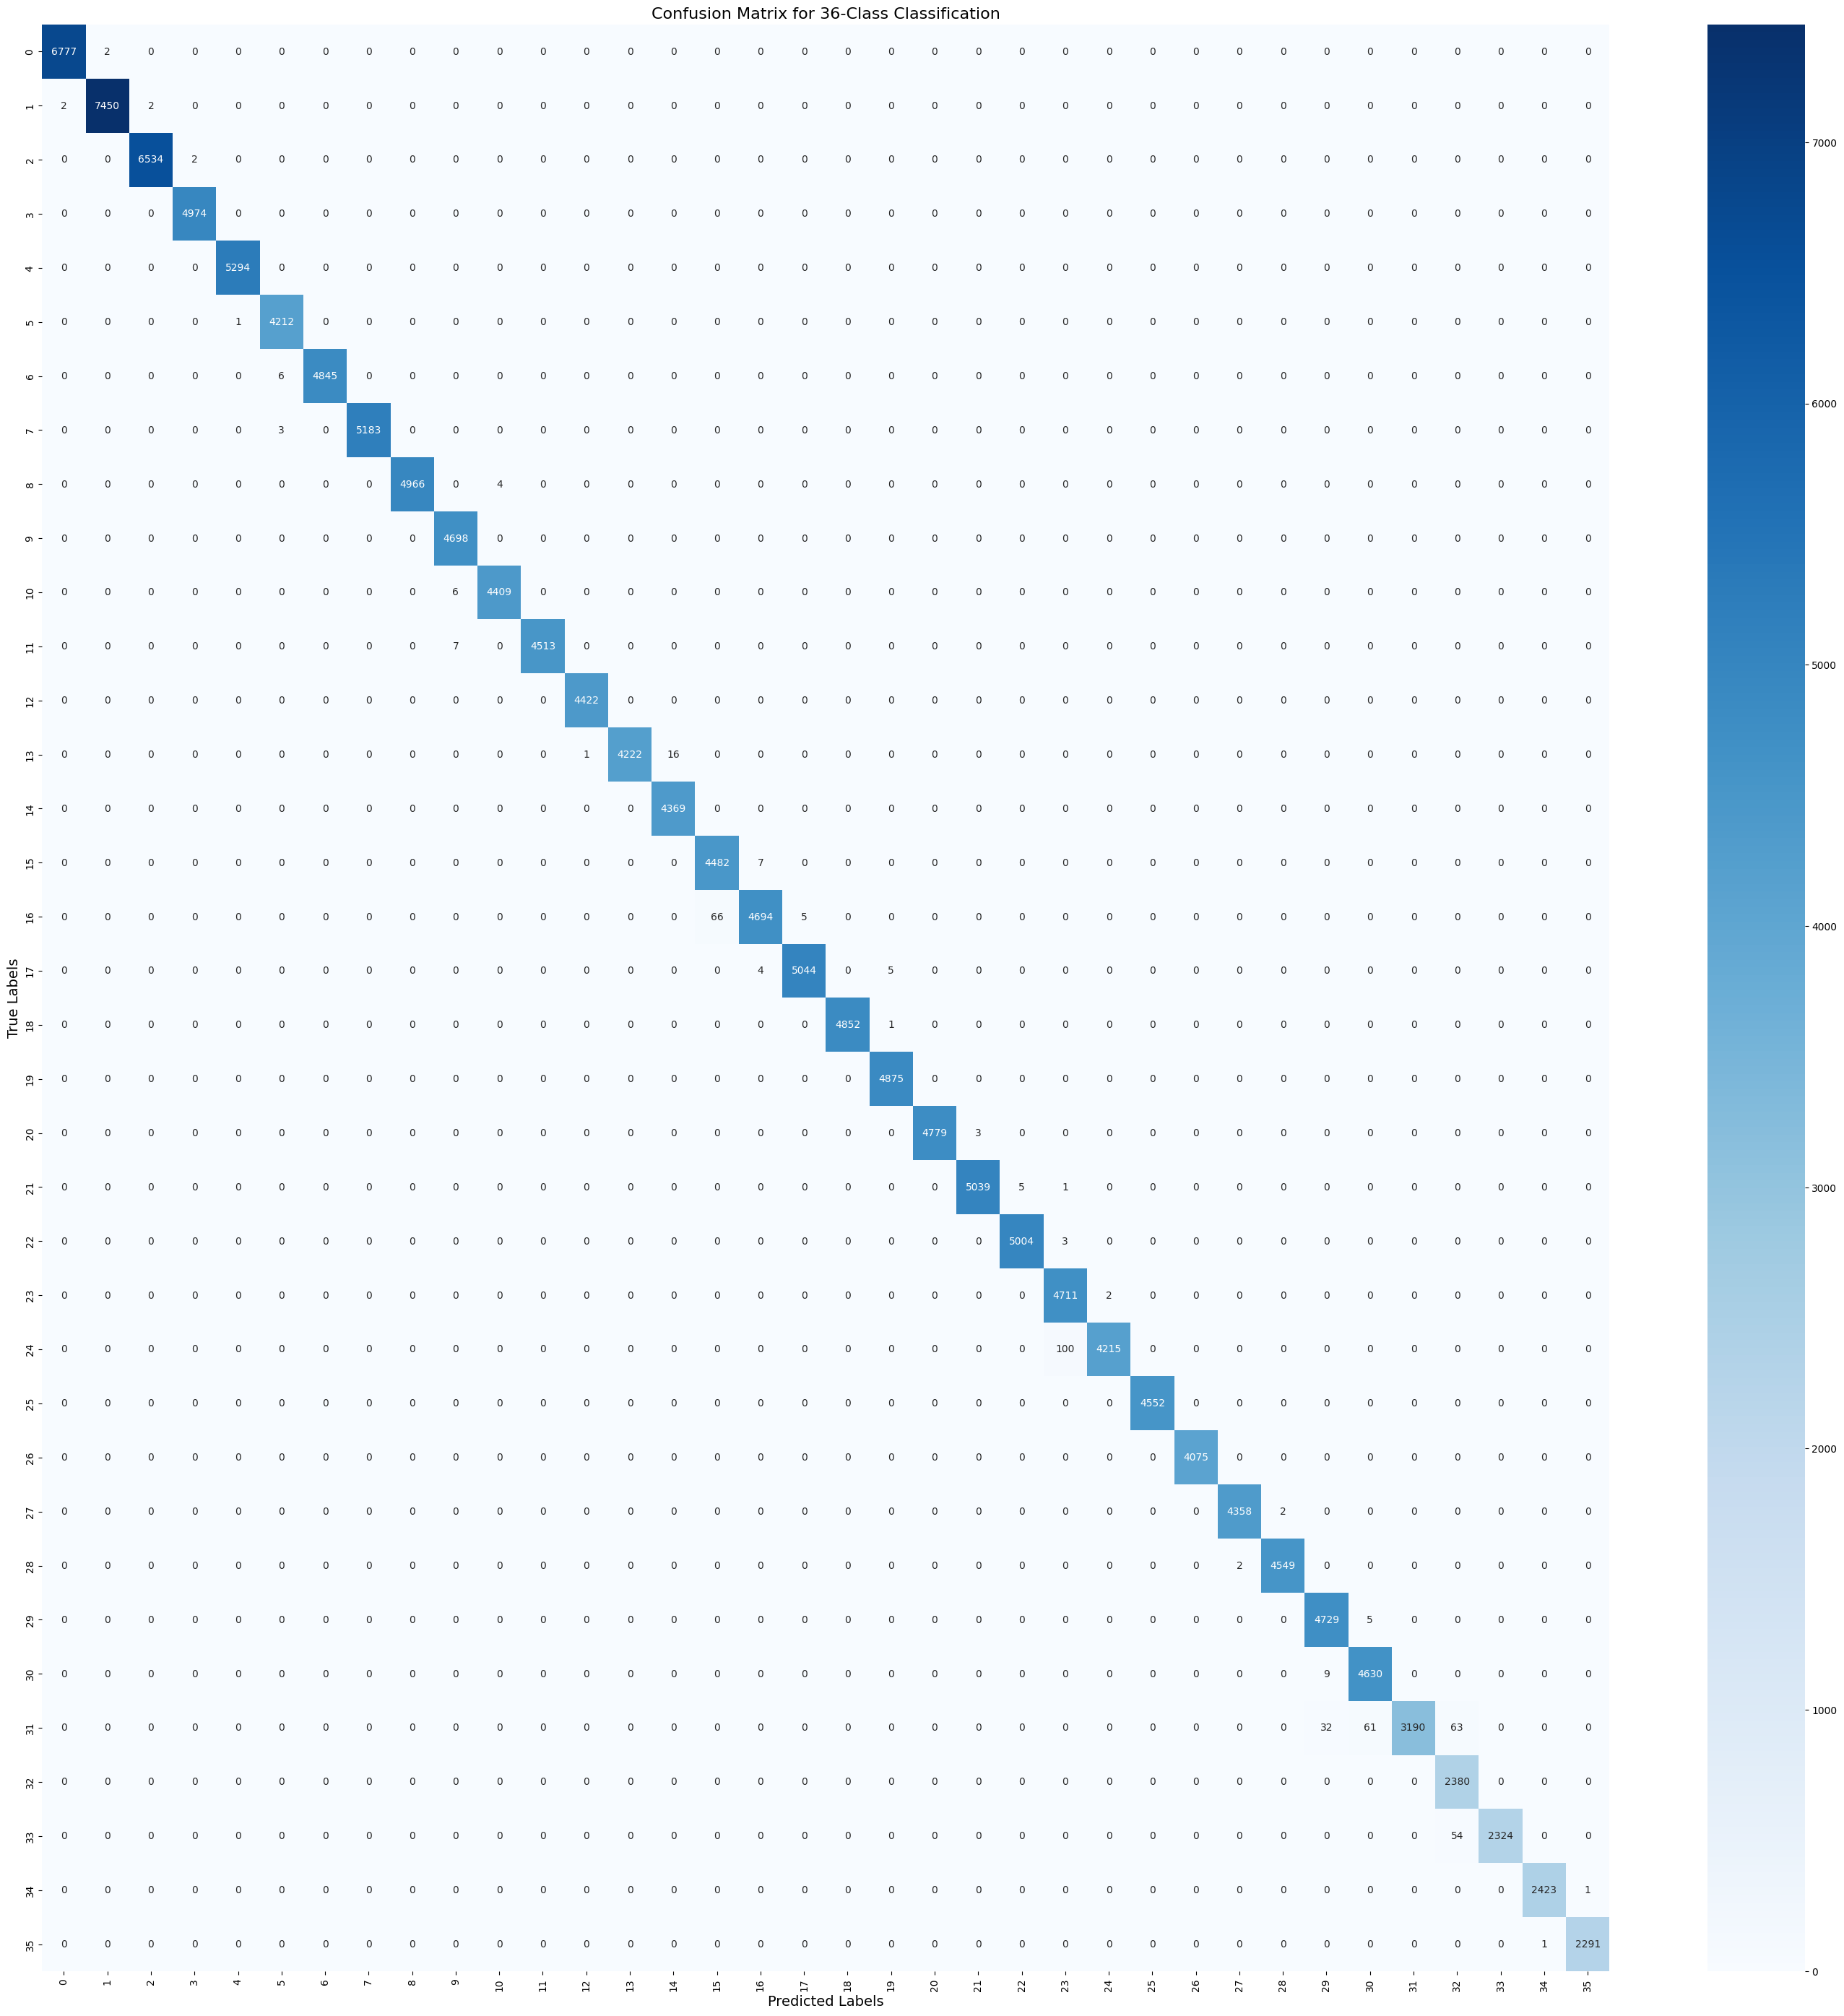

In [49]:
# Make sure to set an appropriate figure size to avoid overlapping
plt.figure(figsize=(35, 35))  # Increased size to accommodate 36 classes

# Plot the heatmap with proper annotations and formatting
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(36), yticklabels=range(36))

plt.xlabel('Predicted Labels', fontsize=14)  # Increase font size if needed
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix for 36-Class Classification', fontsize=16)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=90)

plt.show()
